# Microsoft Malware Prediction Report

Team:<br>
Julie Kirkpatrick<br>
Thomas Dolan<br>
Kaggle Team Name:<br>
ThomasDolan (couldn't add Julie for some reason)

## Overview of topics covered:
* Data Type Conversion/Loading Data
* Feature Engineering
 * Handling NaNs
 * Fixing Problematic Columns
* Feature Encoding
 * One Hot Encoding
* Modeling
 * Logistic Regression Model
 * K-Nearest Neighbor Model
 * LDA Model
* Submission

<hr style="height:5px;">

## Step 1) Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
import gc
from IPython.display import display

warnings.filterwarnings('ignore')
%matplotlib inline

style.use('seaborn')

pd.options.display.max_columns = None

<hr style="height:5px;">

# Data Cleaning

## Step 2) Load Data/Convert Data Types

### Step 2a) Specify Data Types for Faster Loading (see type-determination.ipynb)

In [2]:
data_types = {'MachineIdentifier': 'object',
              'ProductName': 'category',
              'EngineVersion': 'category',
              'AppVersion': 'category',
              'AvSigVersion': 'category',
              'IsBeta': 'float32',
              'RtpStateBitfield': 'float32',
              'IsSxsPassiveMode': 'float32',
              'DefaultBrowsersIdentifier': 'float32',
              'AVProductStatesIdentifier': 'float32',
              'AVProductsInstalled': 'float32',
              'AVProductsEnabled': 'float32',
              'HasTpm': 'float32',
              'CountryIdentifier': 'float32',
              'CityIdentifier': 'float32',
              'OrganizationIdentifier': 'float32',
              'GeoNameIdentifier': 'float32',
              'LocaleEnglishNameIdentifier': 'float32',
              'Platform': 'category',
              'Processor': 'category',
              'OsVer': 'category',
              'OsBuild': 'float32',
              'OsSuite': 'float32',
              'OsPlatformSubRelease': 'category',
              'OsBuildLab': 'category',
              'SkuEdition': 'category',
              'IsProtected': 'float32',
              'AutoSampleOptIn': 'float32',
              'PuaMode': 'category',
              'SMode': 'float32',
              'IeVerIdentifier': 'float32',
              'SmartScreen': 'category',
              'Firewall': 'float32',
              'UacLuaenable': 'float32',
              'Census_MDC2FormFactor': 'category',
              'Census_DeviceFamily': 'category',
              'Census_OEMNameIdentifier': 'float32',
              'Census_OEMModelIdentifier': 'float32',
              'Census_ProcessorCoreCount': 'float32',
              'Census_ProcessorManufacturerIdentifier': 'float32',
              'Census_ProcessorModelIdentifier': 'float32',
              'Census_ProcessorClass': 'category',
              'Census_PrimaryDiskTotalCapacity': 'float32',
              'Census_PrimaryDiskTypeName': 'category',
              'Census_SystemVolumeTotalCapacity': 'float32',
              'Census_HasOpticalDiskDrive': 'float32',
              'Census_TotalPhysicalRAM': 'float32',
              'Census_ChassisTypeName': 'category',
              'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float32',
              'Census_InternalPrimaryDisplayResolutionHorizontal': 'float32',
              'Census_InternalPrimaryDisplayResolutionVertical': 'float32',
              'Census_PowerPlatformRoleName': 'category',
              'Census_InternalBatteryType': 'category',
              'Census_InternalBatteryNumberOfCharges': 'float32',
              'Census_OSVersion': 'category',
              'Census_OSArchitecture': 'category',
              'Census_OSBranch': 'category',
              'Census_OSBuildNumber': 'float32',
              'Census_OSBuildRevision': 'float32',
              'Census_OSEdition': 'category',
              'Census_OSSkuName': 'category',
              'Census_OSInstallTypeName': 'category',
              'Census_OSInstallLanguageIdentifier': 'float32',
              'Census_OSUILocaleIdentifier': 'float32',
              'Census_OSWUAutoUpdateOptionsName': 'category',
              'Census_IsPortableOperatingSystem': 'float32',
              'Census_GenuineStateName': 'category',
              'Census_ActivationChannel': 'category',
              'Census_IsFlightingInternal': 'float32',
              'Census_IsFlightsDisabled': 'float32',
              'Census_FlightRing': 'category',
              'Census_ThresholdOptIn': 'float32',
              'Census_FirmwareManufacturerIdentifier': 'float32',
              'Census_FirmwareVersionIdentifier': 'float32',
              'Census_IsSecureBootEnabled': 'float32',
              'Census_IsWIMBootEnabled': 'float32',
              'Census_IsVirtualDevice': 'float32',
              'Census_IsTouchEnabled': 'float32',
              'Census_IsPenCapable': 'float32',
              'Census_IsAlwaysOnAlwaysConnectedCapable': 'float32',
              'Wdft_IsGamer': 'float32',
              'Wdft_RegionIdentifier': 'float32',
              'HasDetections': 'float32'}

### Step 2b) Load Data

In [3]:
df = pd.read_csv('../data/train.csv', dtype=data_types)

In [4]:
df = df.sample(100000)

In [5]:
test = pd.read_csv('../data/test.csv', dtype=data_types)

### Step 2c) Convert any attributes that couldn't be converted in read_csv

In [6]:
bool_columns = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'IsProtected', 'SMode',
       'Firewall', 'HasDetections']

unsigned_columns = ['CountryIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier']

In [7]:
def convert_cols_to_bool(df, cols):
    for col in cols:
        df[col] = df[col].astype('bool')

def convert_cols_to_unsigned(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

In [8]:
convert_cols_to_bool(df, bool_columns)
convert_cols_to_unsigned(df, unsigned_columns)

In [9]:
bool_columns = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'IsProtected', 'SMode',
       'Firewall']

unsigned_columns = ['CountryIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier']

In [10]:
convert_cols_to_bool(test, bool_columns)
convert_cols_to_unsigned(test, unsigned_columns)

<hr style="height:5px;">

## Step 3) Dealing with Missing Data

### Step 3a) Drop columns with a lot of missing data

#### Find the columns with lots of missing data

In [11]:
def get_cols_with_many_nans(df, identifier, percentage=0.2):
    """
    Find columns within a dataframe that contain less than x% non-NaN values.

    :param df (DataFrame): A pandas dataframe
    :param identifier (string): Any column with no NaNs, used to compute the threshold (not actually altered)
    :param percentage (float): The lowest amount of non-NaN values you're willing to tolerate.
    :return: (list): Columns that don't meet the minimum number of non-null values.
    """
    result = []
    total_rows = df[identifier].count()
    threshold = int(total_rows * percentage)
    for col in df.columns:
        if df[col].isna().sum() > threshold:
            result.append(col)
    return result

In [12]:
cols_with_many_nans = get_cols_with_many_nans(df, 'MachineIdentifier')
print("List of columns with a lot of missing values:\n")
print("COLUMN | % MISSING\n")
for col in cols_with_many_nans:
    print(f"{col} | {((df[col].isna().sum() / df['HasDetections'].count()) * 100):2f}%")

List of columns with a lot of missing values:

COLUMN | % MISSING

DefaultBrowsersIdentifier | 95.175000%
OrganizationIdentifier | 30.587000%
PuaMode | 99.972000%
SmartScreen | 35.806000%
Census_ProcessorClass | 99.580000%
Census_InternalBatteryType | 71.123000%
Census_IsFlightingInternal | 83.009000%
Census_ThresholdOptIn | 63.486000%
Census_IsWIMBootEnabled | 63.381000%


#### Drop the columns with lots of missing data

In [13]:
df.drop(cols_with_many_nans, inplace=True, axis=1)
test.drop(cols_with_many_nans, inplace=True, axis=1)

### Step 3b) Fill NaNs in rows

In [14]:
df.isna().sum()

MachineIdentifier                             0
ProductName                                   0
EngineVersion                                 0
AppVersion                                    0
AvSigVersion                                  0
                                           ... 
Census_IsPenCapable                           0
Census_IsAlwaysOnAlwaysConnectedCapable       0
Wdft_IsGamer                                  0
Wdft_RegionIdentifier                      3459
HasDetections                                 0
Length: 74, dtype: int64

In [15]:
def fillna_mean(df, col):
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.add_categories('UNK')
        df[col].fillna('UNK', inplace=True)
    else:
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [16]:
test_cols = []
for col in test.columns:
    if test[col].isna().sum():
        test_cols.append(col)
        
df_cols = []
for col in df.columns:
    if df[col].isna().sum():
        df_cols.append(col)

In [17]:
for col in test_cols:
    fillna_mean(test, col)

for col in df_cols:
    fillna_mean(df, col)

## Step 4) Drop or Fix Potentially Problematic Columns

### Step 4a) Drop columns that have extremely high skew

#### Let's find a programmatic way to detect lopsided columns

In [18]:
def get_cols_with_high_skew(df, identifier, percentage=0.92):
    ret = []
    for col in df.columns:
        highest_amount_category = df[col].value_counts().max()
        total = df[col].count()
        skew = highest_amount_category / total
        if skew > percentage:
            ret.append(col)
    return ret

In [19]:
cols_with_high_skew = get_cols_with_high_skew(df, "HasDectections")

In [20]:
print("Columns with high skew:")
print("COLUMN | % SKEW")
for col in cols_with_high_skew:
    print(f"{col}  |  {(df[col].value_counts().max() / df[col].count()) * 100}%")

Columns with high skew:
COLUMN | % SKEW
ProductName  |  98.894%
IsBeta  |  100.0%
RtpStateBitfield  |  96.88799999999999%
IsSxsPassiveMode  |  98.232%
AVProductsEnabled  |  96.968%
HasTpm  |  98.758%
Platform  |  96.544%
OsVer  |  96.711%
IsProtected  |  94.555%
AutoSampleOptIn  |  100.0%
SMode  |  93.868%
Firewall  |  97.898%
UacLuaenable  |  99.258%
Census_DeviceFamily  |  99.82900000000001%
Census_HasOpticalDiskDrive  |  92.111%
Census_IsPortableOperatingSystem  |  99.936%
Census_IsFlightsDisabled  |  98.244%
Census_FlightRing  |  93.692%
Census_IsVirtualDevice  |  99.104%
Census_IsPenCapable  |  96.162%
Census_IsAlwaysOnAlwaysConnectedCapable  |  93.43599999999999%


#### And now we drop them

In [21]:
df.drop(cols_with_high_skew, axis=1, inplace=True)

In [22]:
test.drop(cols_with_high_skew, axis=1, inplace=True)

## Conclusion: Data Cleaning

There were 9 columns that we dropped for having too many NaNs. In addition, there were 21 columns that were highly skewed, and therefore probably did not contribute to the HasDectections data. In total, we dropped 30 columns. We also filled missing data with either “unknown” if categorical, or the mean if numeric. If we change the threshold values, the number of columns we drop will differ. The threshold values that we choose may or may not have led to dropping useful data.

# Exploratory Data Analysis

#### How do our columns correlate with 'HasDetections' (trimmed down for clarity)

In [23]:
def print_categorical_value_counts(df):
    out = []
    for col in df.columns:
        if col != 'MachineIdentifier' and df[col].dtype.name == 'category':
            out.append((df[col].value_counts().count(), col))
    out.sort(key=lambda x: x[0], reverse=True)
    return out

In [24]:
print_categorical_value_counts(df)

[(8531, 'AvSigVersion'),
 (663, 'OsBuildLab'),
 (469, 'Census_OSVersion'),
 (110, 'AppVersion'),
 (70, 'EngineVersion'),
 (53, 'Census_ChassisTypeName'),
 (33, 'Census_OSEdition'),
 (32, 'Census_OSBranch'),
 (30, 'Census_OSSkuName'),
 (13, 'Census_MDC2FormFactor'),
 (11, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (5, 'Census_GenuineStateName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

#### Let's see how some of these columns correspond with 'HasDetections'
#### AvSigVersion

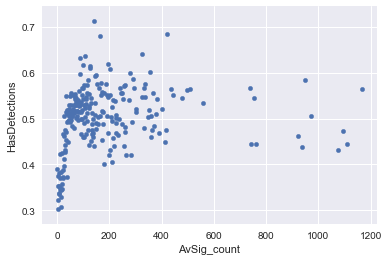

In [25]:
df['AvSig_count'] = df.groupby('AvSigVersion')['AvSigVersion'].transform('count')
test['AvSig_count'] = test.groupby('AvSigVersion')['AvSigVersion'].transform('count')
pd.DataFrame(df.groupby('AvSig_count').HasDetections.mean()).reset_index().plot(kind='scatter', x='AvSig_count', y='HasDetections');

#### No clear groupings when transformed into count, so we will leave it be.

In [26]:
df.drop('AvSigVersion', inplace=True, axis=1)
test.drop('AvSigVersion', inplace=True, axis=1)

#### Next up: OsBuildLab

#### Let's see how OsBuildLab count correlates with HasDetections

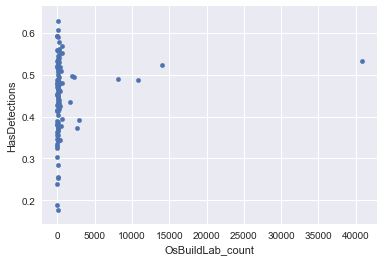

In [27]:
df['OsBuildLab_count'] = df.groupby('OsBuildLab')['OsBuildLab'].transform('count')
pd.DataFrame(df.groupby('OsBuildLab_count').HasDetections.mean()).reset_index().plot(kind='scatter', x='OsBuildLab_count', y='HasDetections');

In [28]:
df.drop('OsBuildLab_count', axis=1, inplace=True)

#### The grouping indicates 4 popular builds and a bunch of others.  Let's split them into categories

In [29]:
def transform_OsBuildLab(x):
    #threshold of 5%
    if (df.OsBuildLab == x).sum() / (df.OsBuildLab == x).count() < .05:
        return 'other'
    else:
        return x

In [30]:
df['OsBuildLab_encoded'] = df.OsBuildLab.apply(transform_OsBuildLab)
test['OsBuildLab_encoded'] = test.OsBuildLab.apply(transform_OsBuildLab)

In [31]:
df['OsBuildLab_encoded'] = df['OsBuildLab_encoded'].astype('category')
test['OsBuildLab_encoded'] = test['OsBuildLab_encoded'].astype('category')

In [32]:
df.drop('OsBuildLab', axis=1, inplace=True)
test.drop('OsBuildLab', axis=1, inplace=True)

#### Next up: Census OSVersion

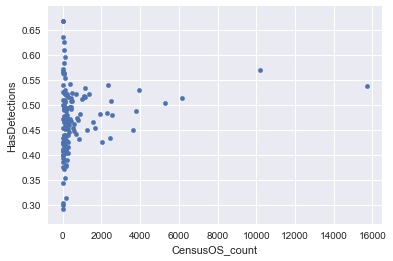

In [33]:
df['CensusOS_count'] = df.groupby('Census_OSVersion')['Census_OSVersion'].transform('count')
pd.DataFrame(df.groupby('CensusOS_count').HasDetections.mean()).reset_index().plot(kind='scatter', x='CensusOS_count', y='HasDetections');

In [34]:
df.drop('CensusOS_count', axis=1, inplace=True)

In [35]:
def transform_CensusOS(x):
    #treshold of 3%
    if (df.Census_OSVersion == x).sum() / (df.Census_OSVersion == x).count() < .03:
        return 'other'
    else:
        return x

In [36]:
df['CensusOS_encoded'] = df.Census_OSVersion.apply(transform_CensusOS)
test['CensusOS_encoded'] = test.Census_OSVersion.apply(transform_CensusOS)

In [37]:
df['CensusOS_encoded'] = df['CensusOS_encoded'].astype('category')
test['CensusOS_encoded'] = test['CensusOS_encoded'].astype('category')

In [38]:
df.drop('Census_OSVersion', axis=1, inplace=True)
test.drop('Census_OSVersion', axis=1, inplace=True)

### 4c) Find Correlated Columns and Drop the Redundant Columns

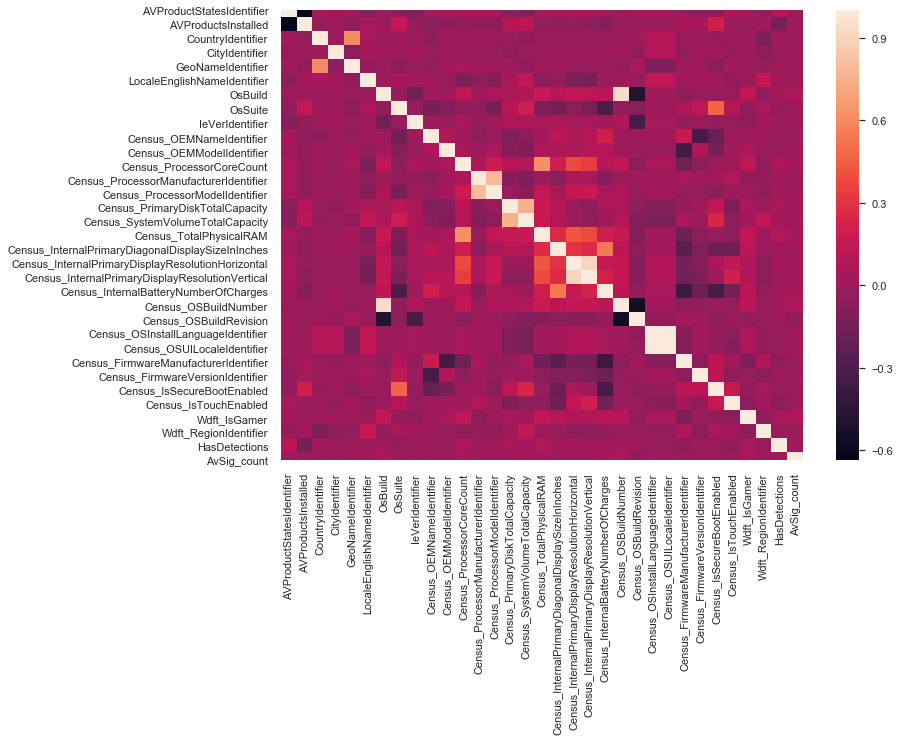

In [39]:
# Let's do this on a smaller sample

df_sample = df.sample(10000)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_sample.corr());

In [40]:
cols_with_correlations = ['AVProductsInstalled', 'Census_OSBuildRevision', 'Census_OSBuildNumber',
           'Census_FirmwareManufacturerIdentifier', 'Census_OEMNameIdentifier',
           'GeoNameIdentifier', 'Census_ProcessorModelIdentifier',
           'Census_InternalPrimaryDisplayResolutionVertical',
           'Census_OSUILocaleIdentifier', 'Census_TotalPhysicalRAM']

In [41]:
df.drop(cols_with_correlations, axis=1, inplace=True)

In [42]:
test.drop(cols_with_correlations, axis=1, inplace=True)

### 4d) Transform Continuous Columns

#### Let's define some helper functions

In [43]:
def report_ranges(df):
    """
    Gathers the ranges of numeric data in sorted order

    Parameters: Dataframe
    Returns: A list of tuples in the form of (range, column name)
    """
    out = []
    for col in df.columns:
        if not df[col].dtype.name in ['category', 'bool', 'object']:
            out.append((df[col].max() - df[col].min(), col))
    out.sort(key=lambda x: x[0], reverse=True)
    return out


def discretize(df, col_name, labels, new_name, quantiles=True):
    """
    Turns numeric data into categories, using pd.cut or pd.qcut, makes a new column, drop the old one.
    Prints out the value_count of the new column

    Parameters: Dataframe, column name, list of labels, new column name, quantile boolean
    Returns: None
    """
    bins = len(labels)
    if quantiles:
        df[new_name] = pd.qcut(df[col_name], bins, labels=labels, duplicates='drop')
    else:
        df[new_name] = pd.cut(df[col_name], bins)
    df.drop(col_name, axis=1, inplace=True)


def log_transform(df, col_name):
    """
    Applies a log1p transformation to a column.
    Plots the new data

    Parameters: Dataframe, column name
    Returns: None
    """
    df[col_name] = np.log1p(df[col_name])


def listify(n):
    """
    Provides a list from user inputs

    Parameters: n = number of items in list
    Returns: list of user inputs
    """
    lst = []
    for i in range(n):
        item = input("Enter item: ")
        lst.append(item)
    return lst


def make_decisions_graphs(df):
    """
    Displays graphs of numerical data and allows user to make decisions on data

    Parameters: Dataframe
    Returns: Multidimensional Array with decision information
    """
    ranges = report_ranges(df)
    decisions = []

    for col in ranges:
        col_name = col[1]
        choice = [col_name]
        sns.set(rc={'figure.figsize': (6, 5)})
        sns.distplot(df[col_name])
        plt.show()
        
        #code from https://www.kaggle.com/youhanlee/my-eda-i-want-to-see-all
        
        fig, ax = plt.subplots(1, 2, figsize=(16, 8))
        sns.kdeplot(df.loc[df['HasDetections'] == 0, col_name], ax=ax[0], label='NoDetection(0)')
        sns.kdeplot(df.loc[df['HasDetections'] == 1, col_name], ax=ax[0], label='HasDetection(1)')

        df.loc[df['HasDetections'] == 0, col_name].hist(ax=ax[1])
        df.loc[df['HasDetections'] == 1, col_name].hist(ax=ax[1])
        ax[1].legend(['NoDetection(0)', 'HasDetection(1)'])

        plt.show()

        func_to_call = int(input("""What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        """))

        choice.append(func_to_call)

        if func_to_call == 1:
            type_cut = int(input("""What type of cut?
            1. cut
            2. qcut
            """))
            if type_cut == 1:
                quantiles = False
            else:
                quantiles = True

            n = int(input("How many labels will you use? "))
            labels = listify(n)

            choice += [labels]
            choice.append(col_name + "_CAT")
            choice.append(quantiles)

        decisions.append(choice)
    return (decisions)


def do_decisions(df, decisions):
    """ Applies the decisions from the make_decisions_graph function"

    Parameters: Dataframe, list of decisions from make_decisions_graph function
    Returns: None
    """
    for choice in decisions:
        col_name = choice[0]
        func_to_call = choice[1]

        if func_to_call == 1:
            discretize(df, col_name, choice[2], choice[3], quantiles=choice[4])
        elif func_to_call == 2:
            log_transform(df, col_name)
        elif func_to_call == 3:
            df.drop([col_name], axis=1, inplace=True)


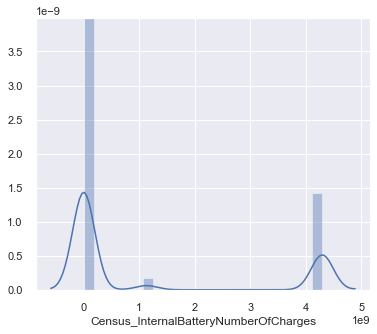

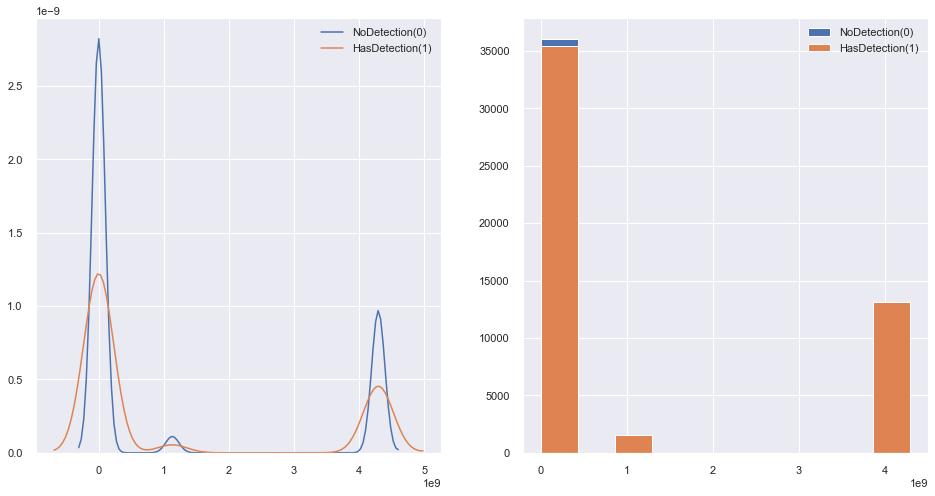

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        1
What type of cut?
            1. cut
            2. qcut
            1
How many labels will you use? 2
Enter item: 1
Enter item: 2


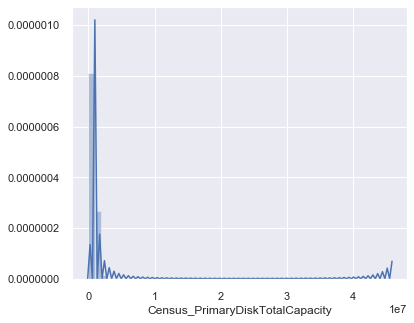

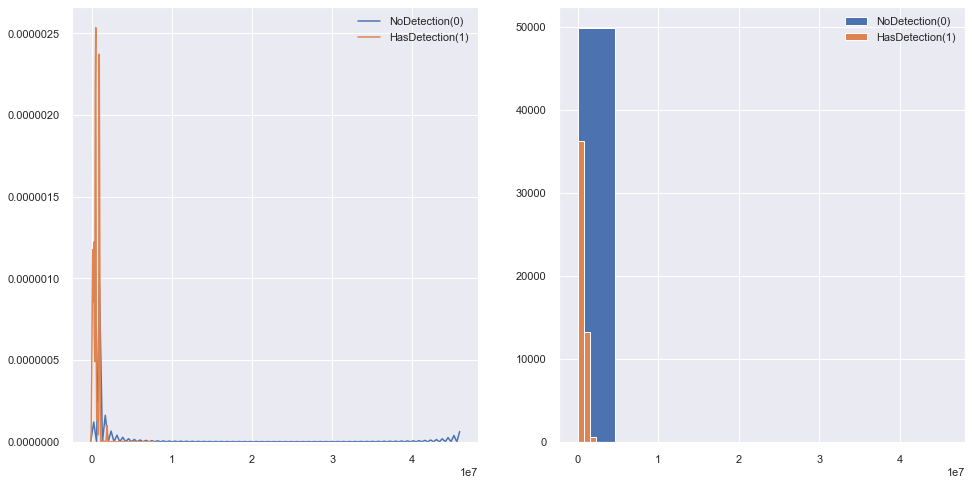

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


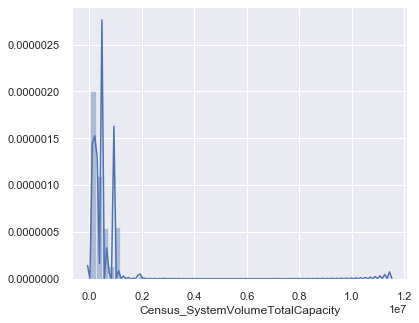

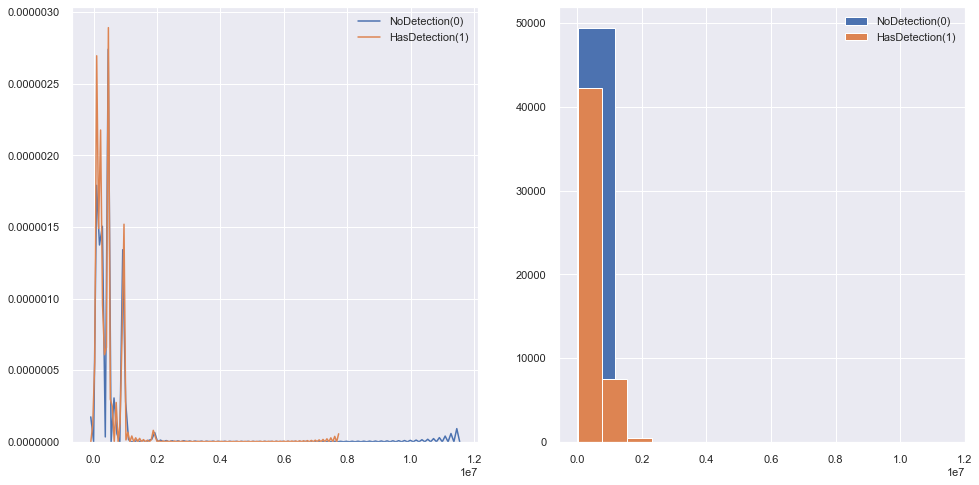

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


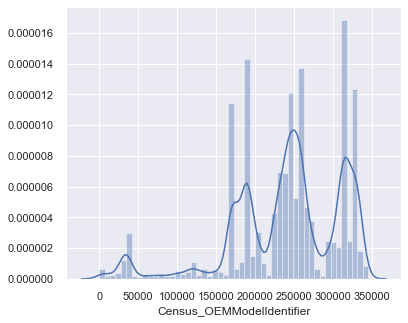

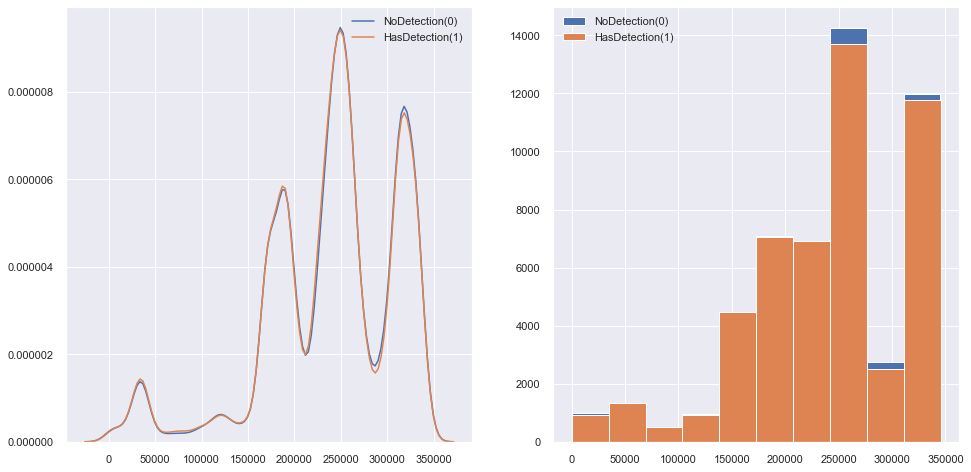

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        1
What type of cut?
            1. cut
            2. qcut
            1
How many labels will you use? 5
Enter item: 1
Enter item: 2
Enter item: 3
Enter item: 4
Enter item: 5


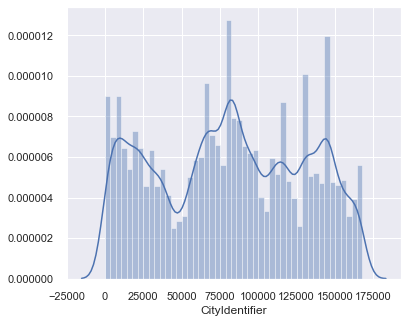

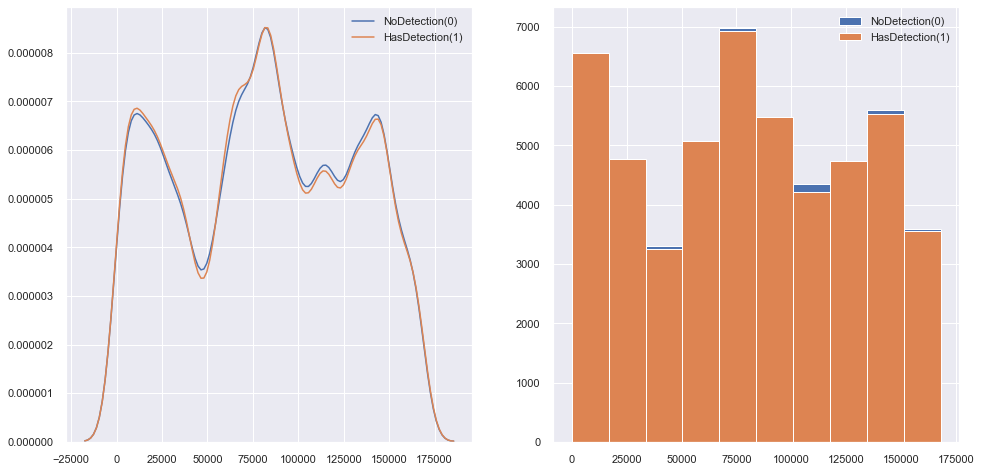

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        4


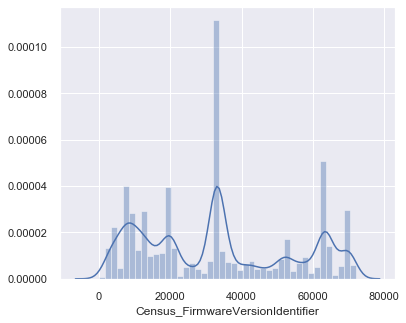

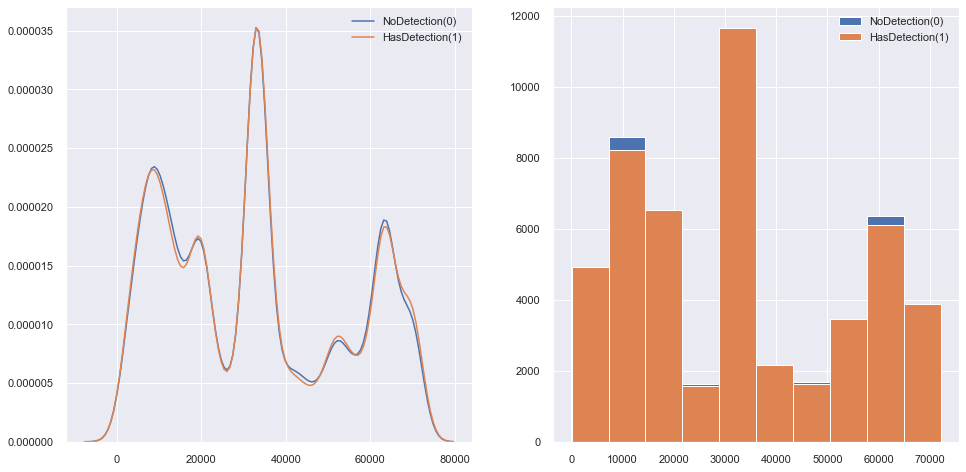

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        4


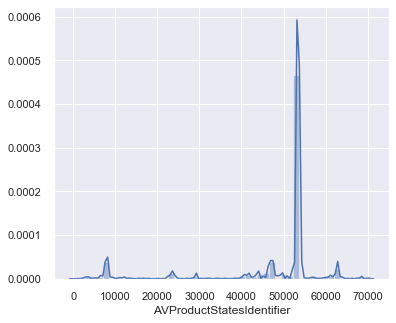

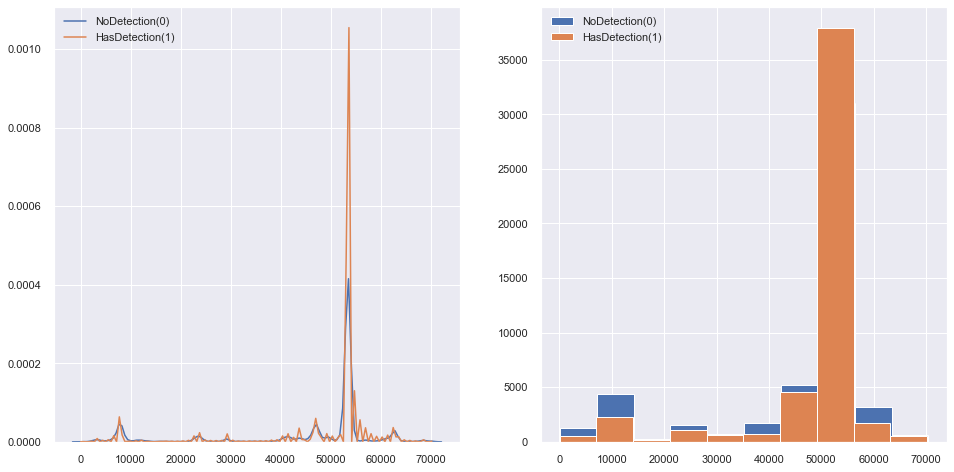

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


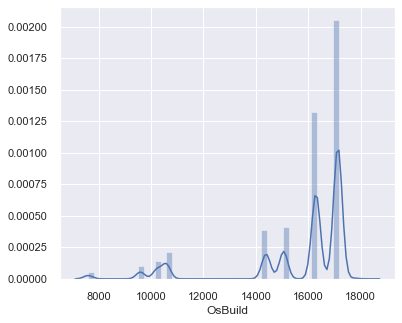

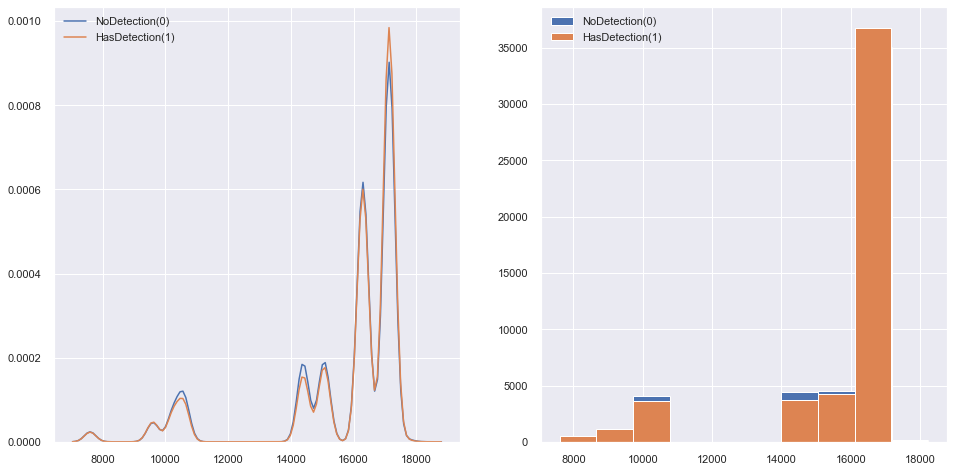

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


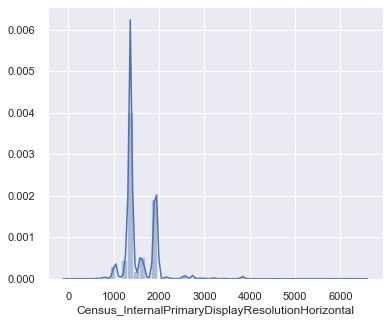

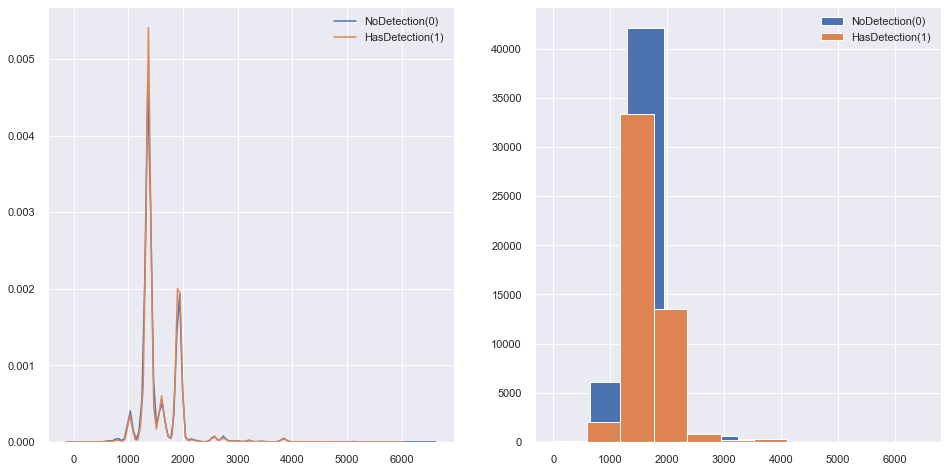

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


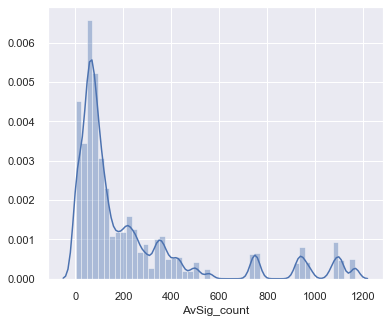

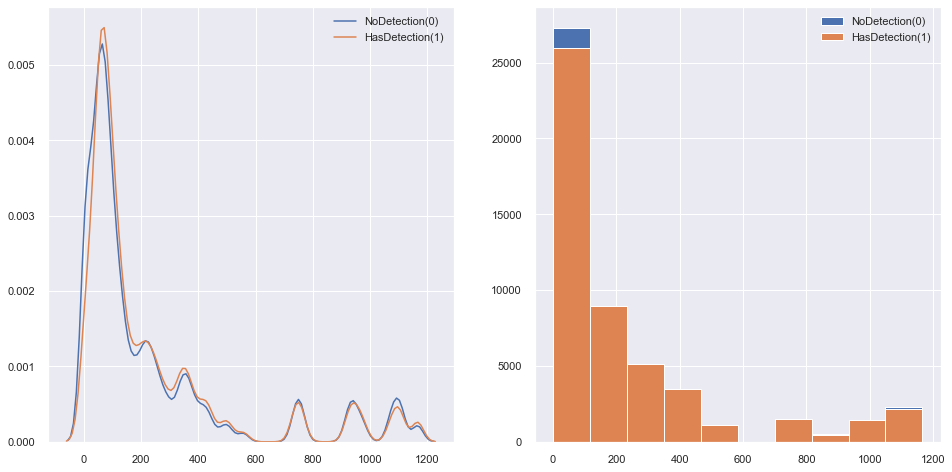

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


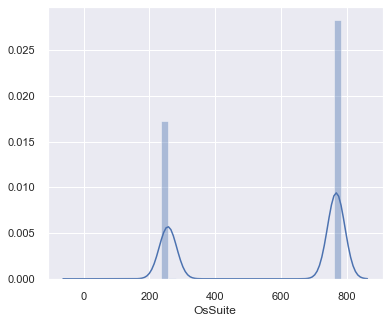

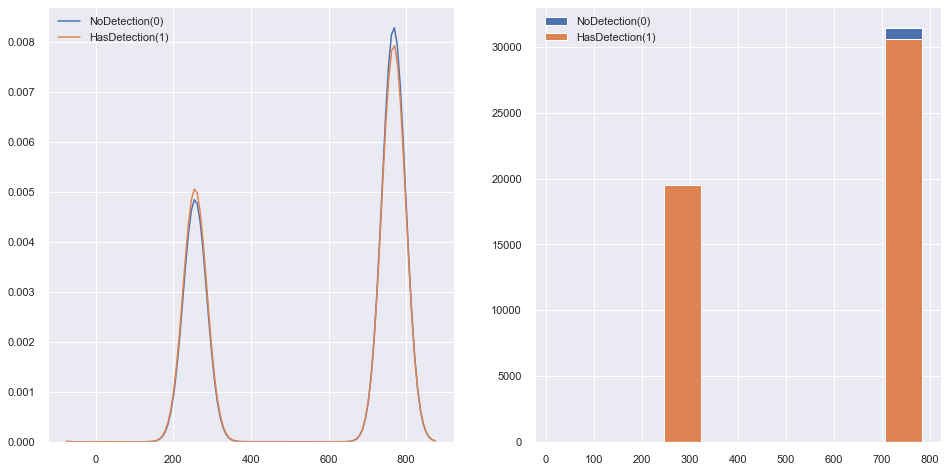

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        1
What type of cut?
            1. cut
            2. qcut
            1
How many labels will you use? 2
Enter item: 1
Enter item: 2


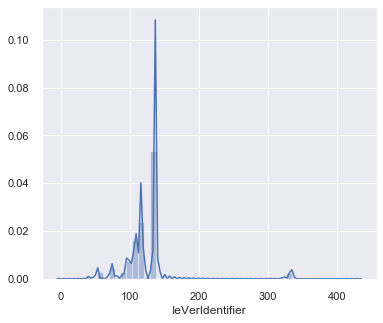

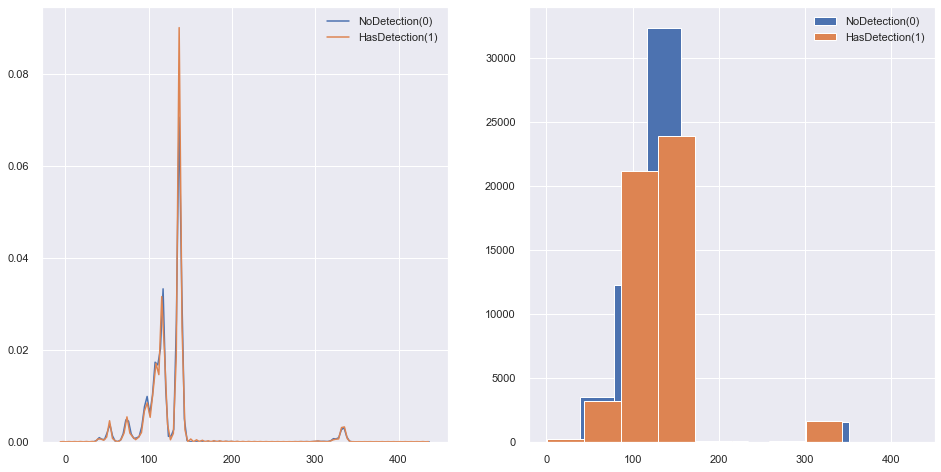

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


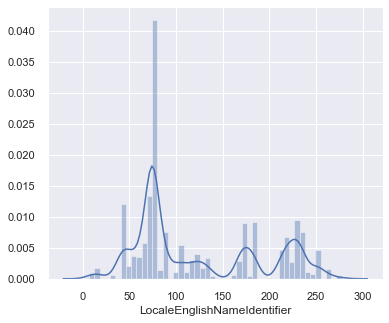

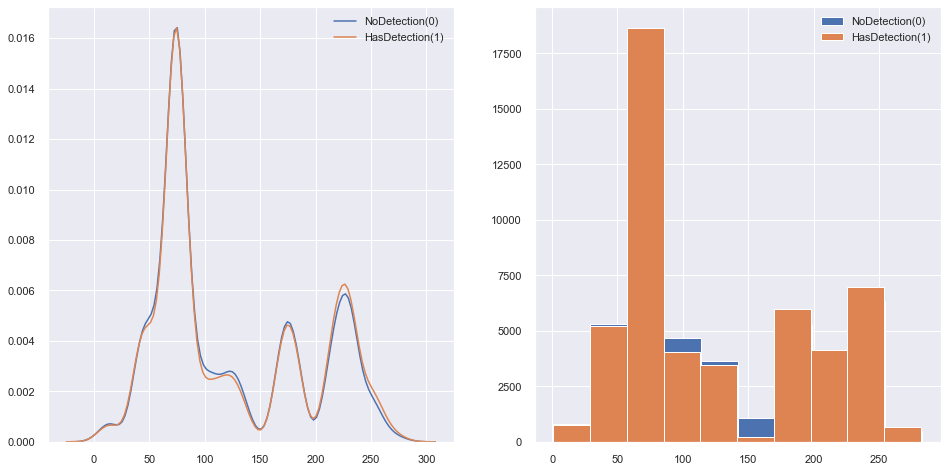

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        1
What type of cut?
            1. cut
            2. qcut
            1
How many labels will you use? 3
Enter item: 1
Enter item: 2
Enter item: 3


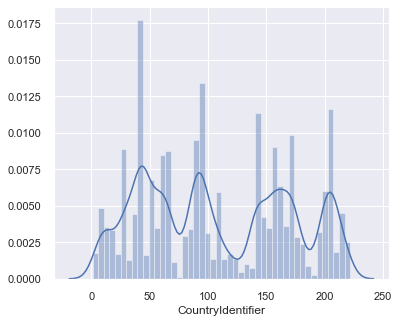

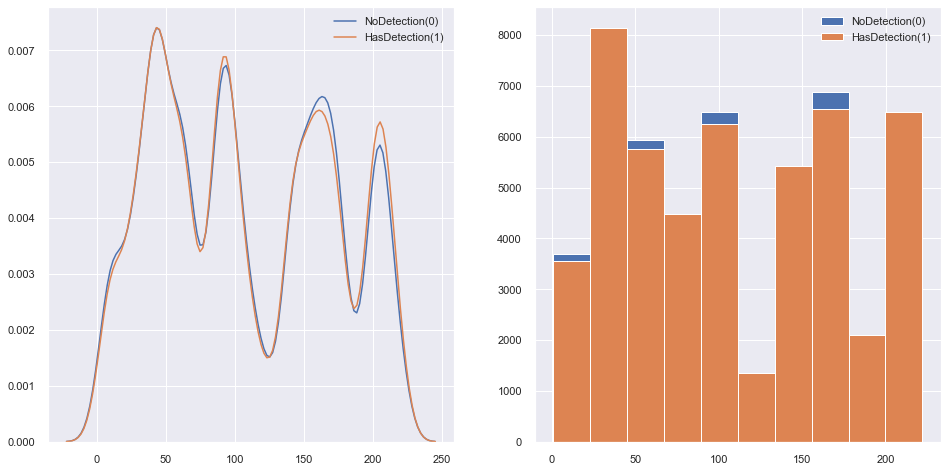

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        4


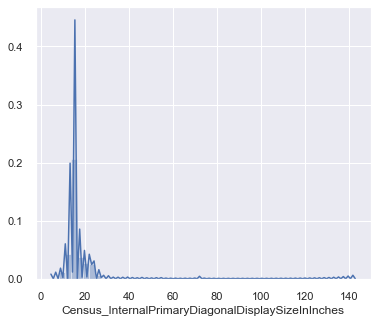

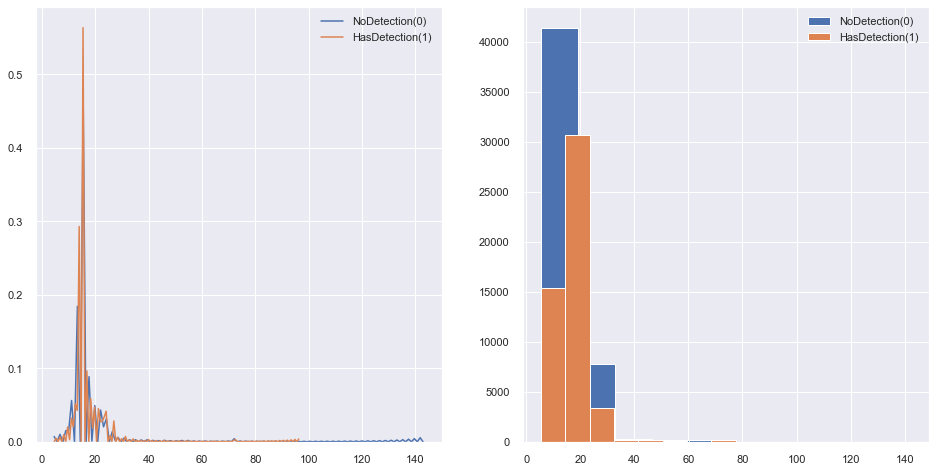

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


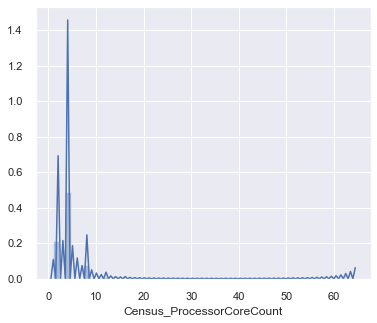

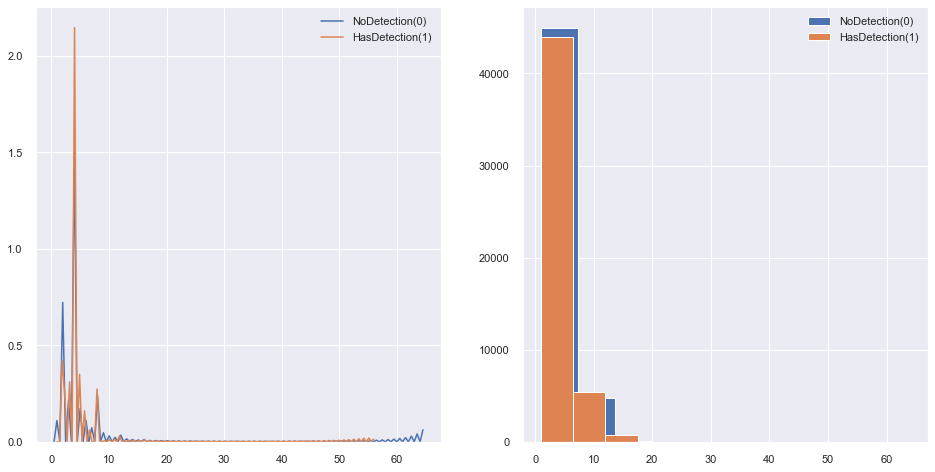

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        2


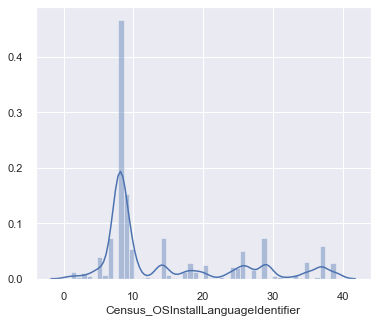

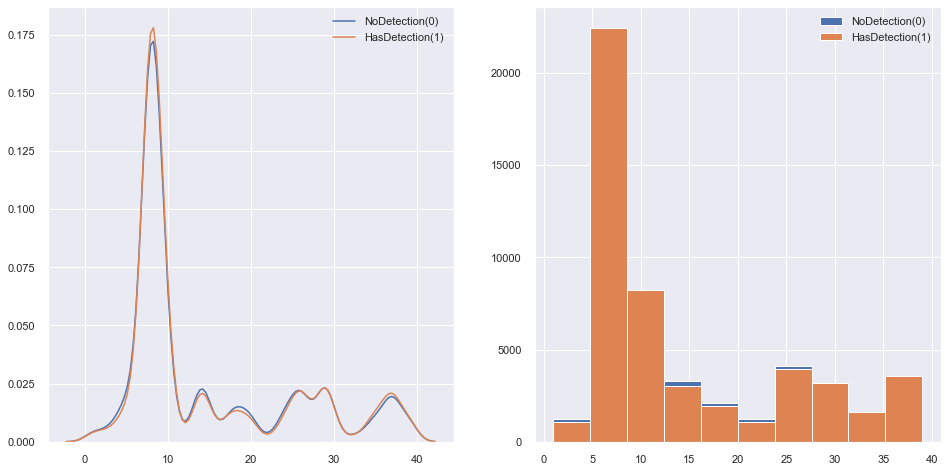

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        4


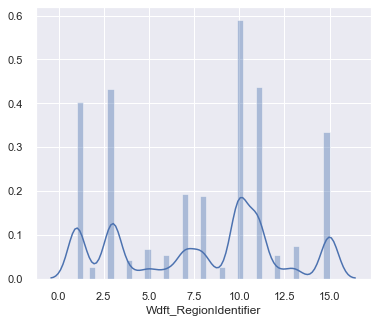

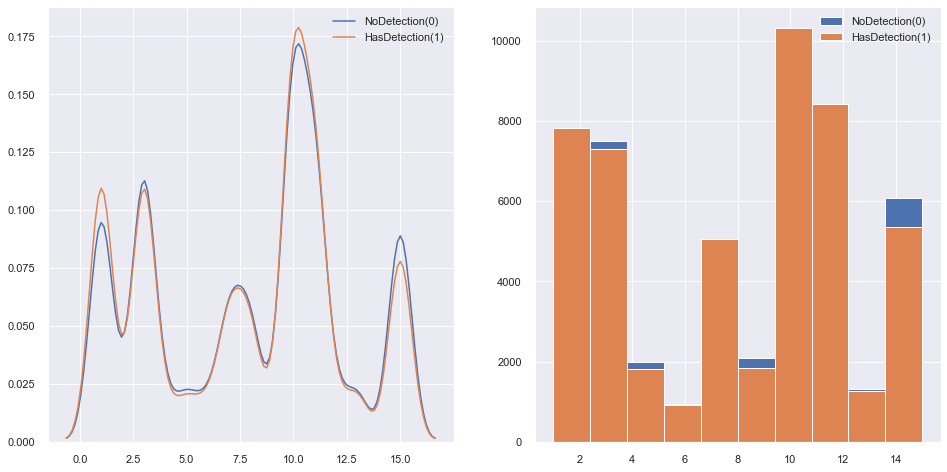

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        4


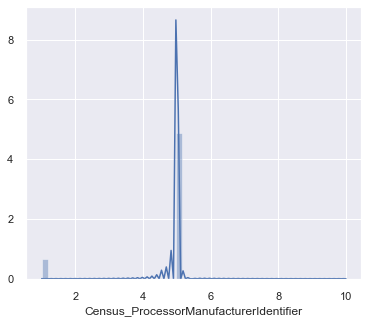

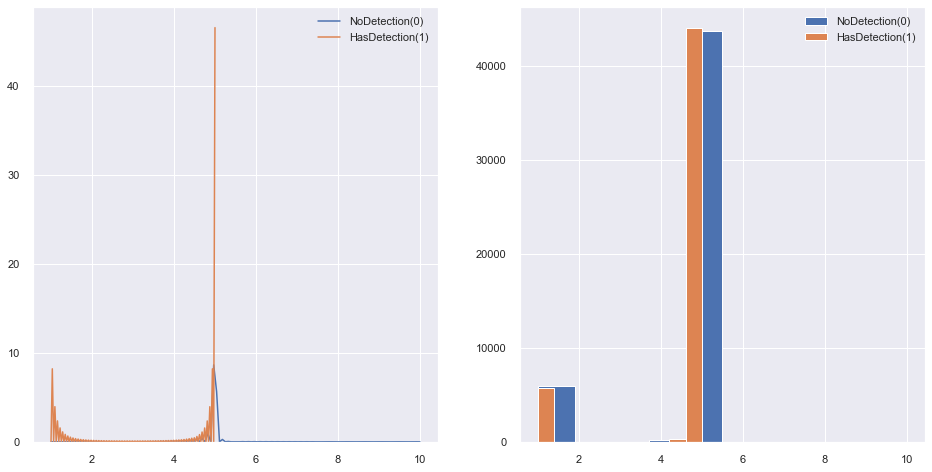

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        4


In [44]:
decisions = make_decisions_graphs(df)

In [45]:
do_decisions(df, decisions)

In [46]:
do_decisions(test, decisions)

### EDA Conclusion

In exploring the data, we found that the data has many different shapes. Any numeric columns that can be discretized were, to save space. Numeric columns with large ranges underwent a log transformation, specifically to run in KNN. We are worried that we have misclassified some of the columns as numeric. We also found many columns that we correlated with each other, and dropped one of each pair. There were a few variables that were correlated with HasDectections based off of our KDE plots: AvSig_count, OsSuite, and Wdft_RegionIdentifier 

## Modeling

### Step 5) One Hot Encoding

#### Concatenate the train/test dataframes so that the number of columns is the same after one hot encoding

In [49]:
df.reset_index(drop=True, inplace=True)

In [50]:
test_copy = test.copy()
df_copy = df.copy()
target = df_copy.HasDetections
df_copy.drop('HasDetections', axis=1, inplace=True)
bigdata = df_copy.append(test_copy, ignore_index=True)

In [51]:
bigdata.shape

(7953253, 42)

In [52]:
dtypes = test_copy.dtypes.apply(lambda x: x.name).to_dict()

In [53]:
bigdata = bigdata.astype(dtype=dtypes)

In [54]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7953253 entries, 0 to 7953252
Data columns (total 42 columns):
MachineIdentifier                                    object
EngineVersion                                        category
AppVersion                                           category
AVProductStatesIdentifier                            float32
CountryIdentifier                                    uint8
CityIdentifier                                       float32
Processor                                            category
OsBuild                                              float32
OsPlatformSubRelease                                 category
SkuEdition                                           category
IeVerIdentifier                                      float32
Census_MDC2FormFactor                                category
Census_ProcessorCoreCount                            float32
Census_ProcessorManufacturerIdentifier               float32
Census_PrimaryDiskTotalCapacit

In [55]:
categoricals = []
for col in bigdata.columns:
    if bigdata[col].dtype.name == 'category':
        categoricals.append(col)
    
#categoricals

In [56]:
bigdata = pd.get_dummies(bigdata, prefix=categoricals, columns=categoricals)

In [68]:
train = bigdata.iloc[:100000]
test = bigdata.iloc[100000:]

In [69]:
train.tail()

,MachineIdentifier,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,OsBuild,IeVerIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_OSInstallLanguageIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,AvSig_count,EngineVersion_1.1.10302.0,EngineVersion_1.1.10401.0,EngineVersion_1.1.11104.0,EngineVersion_1.1.11302.0,EngineVersion_1.1.11400.0,EngineVersion_1.1.11502.0,EngineVersion_1.1.11602.0,EngineVersion_1.1.11701.0,EngineVersion_1.1.11804.0,EngineVersion_1.1.11903.0,EngineVersion_1.1.12002.0,EngineVersion_1.1.12101.0,EngineVersion_1.1.12205.0,EngineVersion_1.1.12300.0,EngineVersion_1.1.12400.0,EngineVersion_1.1.12505.0,EngineVersion_1.1.12603.0,EngineVersion_1.1.12706.0,EngineVersion_1.1.12804.0,EngineVersion_1.1.12805.0,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13102.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13406.0,EngineVersion_1.1.13407.0,EngineVersion_1.1.13503.0,EngineVersion_1.1.13504.0,EngineVersion_1.1.13601.0,EngineVersion_1.1.13701.0,EngineVersion_1.1.13704.0,EngineVersion_1.1.13802.0,EngineVersion_1.1.13803.0,EngineVersion_1.1.13804.0,EngineVersion_1.1.13902.0,EngineVersion_1.1.13903.0,EngineVersion_1.1.14001.0,EngineVersion_1.1.14002.0,EngineVersion_1.1.14003.0,EngineVersion_1.1.14102.0,EngineVersion_1.1.14103.0,EngineVersion_1.1.14104.0,EngineVersion_1.1.14201.0,EngineVersion_1.1.14202.0,EngineVersion_1.1.14303.0,EngineVersion_1.1.14305.0,EngineVersion_1.1.14306.0,EngineVersion_1.1.14405.2,EngineVersion_1.1.14500.2,EngineVersion_1.1.14500.5,EngineVersion_1.1.14600.4,EngineVersion_1.1.14700.3,EngineVersion_1.1.14700.4,EngineVersion_1.1.14700.5,EngineVersion_1.1.14800.1,EngineVersion_1.1.14800.3,EngineVersion_1.1.14901.3,EngineVersion_1.1.14901.4,EngineVersion_1.1.15000.1,EngineVersion_1.1.15000.2,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,EngineVersion_1.1.15300.5,EngineVersion_1.1.15300.6,EngineVersion_1.1.15400.3,EngineVersion_1.1.15400.4,EngineVersion_1.1.15400.5,EngineVersion_1.1.9700.0,AppVersion_4.10.14393.0,AppVersion_4.10.14393.1066,AppVersion_4.10.14393.1198,AppVersion_4.10.14393.1532,AppVersion_4.10.14393.1593,AppVersion_4.10.14393.1613,AppVersion_4.10.14393.1794,AppVersion_4.10.14393.2248,AppVersion_4.10.14393.2273,AppVersion_4.10.14393.2457,AppVersion_4.10.14393.2608,AppVersion_4.10.14393.726,AppVersion_4.10.14393.953,AppVersion_4.10.205.0,AppVersion_4.10.207.0,AppVersion_4.10.209.0,AppVersion_4.11.15063.0,AppVersion_4.11.15063.1154,AppVersion_4.11.15063.1155,AppVersion_4.11.15063.447,AppVersion_4.11.15063.994,AppVersion_4.12.16299.0,AppVersion_4.12.16299.15,AppVersion_4.12.17007.17121,AppVersion_4.12.17007.17123,AppVersion_4.12.17007.18011,AppVersion_4.12.17007.18021,AppVersion_4.12.17007.18022,AppVersion_4.13.17133.1,AppVersion_4.13.17134.1,AppVersion_4.13.17134.112,AppVersion_4.13.17134.191,AppVersion_4.13.17134.228,AppVersion_4.13.17134.319,AppVersion_4.13.17134.320,AppVersion_4.13.17604.1000,AppVersion_4.13.17618.1000,AppVersion_4.13.17623.1002,AppVersion_4.13.17627.1000,AppVersion_4.13.17634.1000,AppVersion_4.13.17639.1000,AppVersion_4.14.17613.18038,AppVersion_4.14.17613.18039,AppVersion_4.14.17639.18041,AppVersion_4.15.17643.1000,AppVersion_4.15.17650.1001,AppVersion_4.15.17655.1000,AppVersion_4.15.17661.1001,AppVersion_4.15.17666.1000,AppVersion_4.16.17656.18051,AppVersion_4.16.17656.18052,AppVersion_4.17.17672.1000,AppVersion_4.17.17677.1000,AppVersion_4.17.17682.1000,AppVersion_4.17.17685.20082,AppVersion_4.17.17686.1003,AppVersion_4.18.1806.18062,AppVersion_4.18.1806.20015,AppVersion_4.18.1806.20021,AppVersion_4.18.1806.20033,AppVersion_4.18.1807.18070,AppVersion_4.18.1807.18072,AppVersion_4.18.1807.18075,AppVersion_4.1

In [70]:
print(train.shape)
print(test.shape)
print(target.shape)

(100000, 465)
(7853253, 465)
(100000,)


### Step 6) Making and Fitting Models

In [71]:
train_id = train.MachineIdentifier
train.drop('MachineIdentifier', axis=1, inplace=True)
test_id = test.MachineIdentifier
test.drop('MachineIdentifier', axis=1, inplace=True)

#### Side step: downcast float64 'AvSigValue' and drop a column with infinite values

In [72]:
train['AvSig_count'] = pd.to_numeric(train['AvSig_count'], downcast='float')
test['AvSig_count'] = pd.to_numeric(test['AvSig_count'], downcast='float')

In [77]:
train.drop('Census_InternalPrimaryDisplayResolutionHorizontal', axis=1, inplace=True)
test.drop('Census_InternalPrimaryDisplayResolutionHorizontal', axis=1, inplace=True)

#### Modeling time.

#### Logistic Regression: 0.59877

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_model = lr.fit(train, target)

In [148]:
lr_model.score(train, target)
yhat_pLR = lr_model.predict_proba(test[:1000])
yhat_pLR[:100][:,1]

array([0.45489826, 0.51994076, 0.51621128, 0.39822154, 0.49526974,
       0.40766112, 0.23272811, 0.18807917, 0.37474992, 0.2249703 ,
       0.30255737, 0.2000878 , 0.41120206, 0.53218573, 0.43063008,
       0.44568717, 0.5292042 , 0.44432673, 0.56700204, 0.43272626,
       0.4895063 , 0.46885281, 0.51168668, 0.41894258, 0.48992528,
       0.64052496, 0.53571038, 0.56585092, 0.40103705, 0.49670496,
       0.32236341, 0.29258808, 0.4222372 , 0.24100105, 0.443276  ,
       0.52875463, 0.55671991, 0.46683305, 0.54541891, 0.2887749 ,
       0.27080496, 0.51833993, 0.25735052, 0.35233082, 0.44146849,
       0.3916114 , 0.43383692, 0.46009055, 0.4550246 , 0.12278959,
       0.52951507, 0.43643726, 0.43451717, 0.72614233, 0.42399499,
       0.46136407, 0.15796587, 0.52302518, 0.49591324, 0.48184068,
       0.50096263, 0.47359992, 0.56002995, 0.47690763, 0.18944164,
       0.54104617, 0.34894236, 0.13541126, 0.57617313, 0.46862311,
       0.45293628, 0.35783424, 0.34064205, 0.4221801 , 0.40981

#### KNN: 0.7584

In [149]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=2)
kn_model = kn.fit(train, target)
kn_model.score(train, target)

0.7584

In [150]:
yhat_p = kn_model.predict_proba(test[:1000])
yhat_p[:100][:,1]

array([0.5, 0. , 0.5, 0.5, 0.5, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. ,
       0. , 0.5, 1. , 0. , 0. , 1. , 1. , 0. , 0.5, 0.5, 0.5, 0. , 0.5,
       1. , 0.5, 1. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 1. , 1. , 1. ,
       0.5, 0. , 0.5, 1. , 0. , 1. , 0.5, 1. , 0.5, 0. , 0.5, 1. , 0.5,
       0.5, 1. , 1. , 0.5, 0. , 0.5, 0.5, 1. , 1. , 0.5, 0. , 0.5, 0. ,
       0. , 1. , 0.5, 0. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0. , 1. , 0.5,
       0. , 1. , 0. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0.5,
       0.5, 0.5, 1. , 0. , 0.5, 1. , 0.5, 0.5, 1. ])

#### Let's try one more model that we learned in class: LDA : 0.60012

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LD = LinearDiscriminantAnalysis()
LD_model = LD.fit(train, target)
LD_model.score(train, target)

0.60012

In [101]:
yhat_LD = LD_model.predict_proba(test[:1000])
yhat_LD[:100][:,1]

array([0.4643287 , 0.57750475, 0.50698583, 0.41112998, 0.55369467,
       0.40594215, 0.24626013, 0.1932397 , 0.35319359, 0.24111957,
       0.31829833, 0.25692362, 0.43059859, 0.54642872, 0.40932871,
       0.45047355, 0.54065543, 0.50930043, 0.57981618, 0.4464655 ,
       0.47769881, 0.46555947, 0.50585204, 0.36795702, 0.46174207,
       0.65302799, 0.53193864, 0.56314636, 0.46058055, 0.50936607,
       0.32501418, 0.29598225, 0.43119365, 0.24731545, 0.449372  ,
       0.52087982, 0.55497494, 0.45877177, 0.5407054 , 0.30132113,
       0.28771231, 0.51462266, 0.27461986, 0.00244723, 0.45813112,
       0.38844869, 0.49024826, 0.45919773, 0.51027645, 0.15665549,
       0.59300098, 0.32475332, 0.43102128, 0.7182484 , 0.4373069 ,
       0.45225318, 0.1461747 , 0.5130877 , 0.50595758, 0.47793869,
       0.5072316 , 0.53326715, 0.55475618, 0.49005232, 0.19978595,
       0.59955091, 0.34359919, 0.16781526, 0.58612615, 0.48430455,
       0.41001699, 0.36444699, 0.34224271, 0.4290059 , 0.40438

#### What about one we didn't learn in class? Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier
import sklearn
FC = RandomForestClassifier(n_jobs=2, random_state=0)
FC_model = FC.fit(train, target)
FC_predict = FC_model.predict(train)
print(FC_model.score(train, target))  #overfitting for sure
sklearn.metrics.confusion_matrix(FC_predict, target)

0.98642


array([[49619,  1094],
       [  264, 49023]], dtype=int64)

In [128]:
FC2 = RandomForestClassifier(n_jobs=2, random_state=0)
features = ["AvSig_count", "Wdft_RegionIdentifier","OsSuite_CAT_(15.232, 400.0]", "OsSuite_CAT_(400.0, 784.0]"]
FC2_model = FC.fit(train[features], target)
FC2_predict = FC2_model.predict(train[features])
print(FC2_model.score(train[features], target))
sklearn.metrics.confusion_matrix(FC2_predict, target)

0.60261


array([[28807, 18663],
       [21076, 31454]], dtype=int64)

### Results

Overall, our models are not scoring very well, but with a look at the Kaggle scoreboard, it seems like around 60 is actually ok. Our data isn't inbalanced, so we didn't have to deal with that.

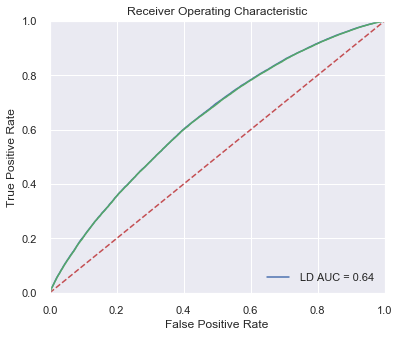

In [146]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = LD_model.predict_proba(train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(target, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = ' LD AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

probs = lr_model.predict_proba(train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(target, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'lr AUC = %0.2f' % roc_auc)



plt.show()

|  model |  score |
|---|---|
|  Logistic Regression | 0.59877  |
|  KNN | 0.7584  |
|  LDA | 0.60012  |
| Random Forest  | 0.98642  |
| Random Forest with feature selection | 0.60261 |

In [90]:
submissionLR = pd.DataFrame({'MachineIdentifier': test_id,
                           'HasDetections': yhat_pLR[:,1]}) # Create a submission DataFrame
submissionLR.to_csv('../submissions/MalwareSubmissionsLR.csv', index=False) # Export to csv!

ValueError: array length 750 does not match index length 7853253

# Conclusions

#### The models
We ran this on three separate classifiers that we used in our homeworks.  The logistic regression model performed only slightly better than if we had randomly guessed the outcomes (Score: .507)  However, the K Nearest Neighbors classifier performed much better (0.75) with a n-neighbor parameter of 2.  Unfortunately, there is a good chance that the KNN model overfit our data. Also, this model may have performed better if the range of some of the features was reduced.  The last model we ran was Linear Discriminant Analysis, which performed worse than KNN but better than LR (0.60).  Surpisingly, this wasn't far off from our final score in Kaggle of 0.58!

#### Final Kaggle Score: 0.58.  Why so low?
The possible reasons for our model scoring so low are:
* Small train dataset
 * We subsetted our dataset to 50,000* samples in the interest of building a model in a reasonal amount of time (builing a model on a larger dataset would have taken a long time to run).  In hindsight we probably could have upped it a bit.
* Rudimentary models
 * We stuck to the models learned in class.  Other competitors used more sophisticated models and hyperparameter tuning.  Eventually, when we feel more comfortable with more advanced models, we might try to use one to get a better score.
* Lots of lost columns
 * We dropped many columns in our data cleaning for one reason or another.  This is partly due to the fact that we wanted a smaller dataset, but also because we didn't know how to deal with some of them.
* Incorrect data types
 * Another potential problem was that we may have miscategorized some columns like "CityIdentifier" as a continuous type rather than categorical.  However, we felt that we didn't know how to properly convert it to a categorical.  It would have added too many columns to our dataframe after one hot encoding if we changed it to categorical.
 
 *we reran everything with 100,000 samples, and saw some slight improvements.